We first must import the libraries we'll be using for this analysis. We may not end up using all of them, but it's always better to have them and not need them than need them and find out later that you don't have them.

The primary libraries we'll use for this analysis are pandas, numpy, matplotlib, plotly, seaborn, and SciKitLearn.

In [37]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ All libraries loaded successfully!")
print("📚 You're ready to start your analysis!")

✅ All libraries loaded successfully!
📚 You're ready to start your analysis!


Now we import the data and print the headers and description to ensure it's been imported correctly. In this case we're loading our data from a URL, so we copy and paste that into our code and use pandas to read the CSV file and print out some initial findings like the header rows and an overall description of the dataframe.

In [38]:
#Import dataset
url = 'https://raw.githubusercontent.com/Veggieleezy/ISOM835-Classification-Term-Project/main/credit_risk_dataset.csv'
credit_risk_df = pd.read_csv(url)
credit_risk_df.head()

#Print head and description
print("🏠 Credit Dataset Loaded!")
print(f"\n📊 Dataset shape: {credit_risk_df.shape[0]:,} clients, {credit_risk_df.shape[1]} variables")
print("\n👀 First few rows:")
display(credit_risk_df.head())

print("\n📈 Summary Statistics:")
display(credit_risk_df.describe())

🏠 Credit Dataset Loaded!

📊 Dataset shape: 32,581 clients, 12 variables

👀 First few rows:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4



📈 Summary Statistics:


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In order to clean and prepare the data for analysis, first we check the dataframe for nulls and eliminate them if need be. Then we check the datatypes for our columns to find which columns we can best use for analysis.

In [39]:
#Clean/check for nulls
credit_risk_df = credit_risk_df.dropna()
print(credit_risk_df.isnull().sum())

#Check data types to ensure numerical values can be understood and processed
print(credit_risk_df.dtypes)


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


Let's do some initial data exploration with histograms about our variables. Some of these may prove redundant or otherwise unnecessary, but they give us helpful insights to which variables we'll want to take closer looks at.

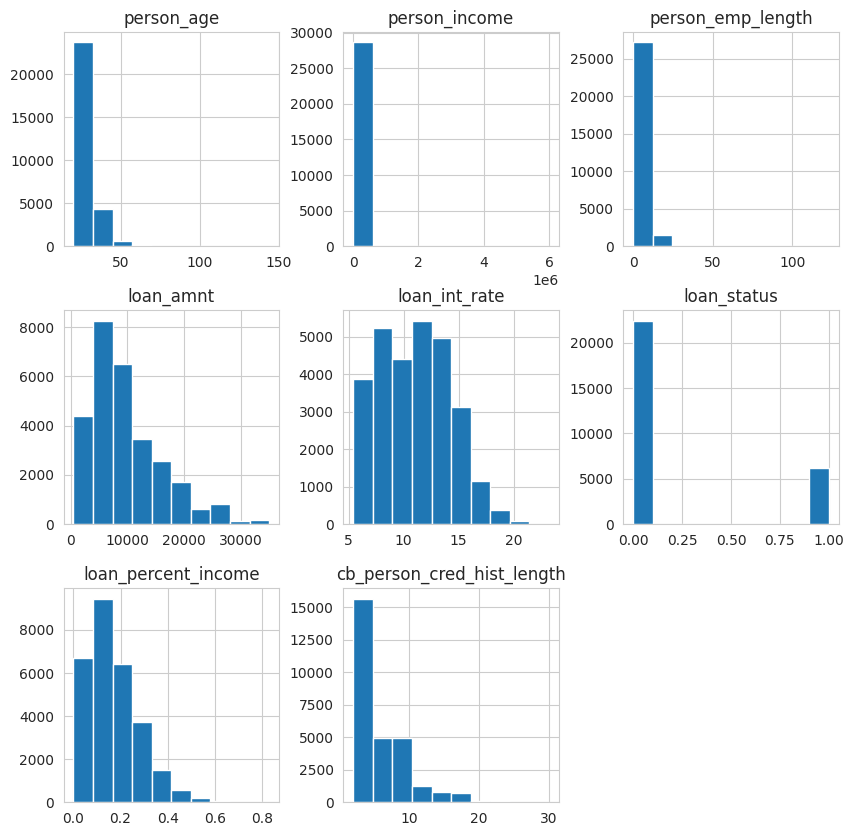

In [40]:
#Histograms of variable distributions
credit_risk_df.hist(figsize=(10, 10))
person_age_chart = px.histogram(credit_risk_df, x='person_age', barmode='group',title='Age Distribution')
person_age_chart.show()
person_income_chart = px.histogram(credit_risk_df, x='person_income', barmode='group',title='Income Distribution')
person_income_chart.show()
person_home_ownership_chart = px.histogram(credit_risk_df, x='person_home_ownership', barmode='group',title='Home Ownership')
person_home_ownership_chart.show()
person_emp_length_chart = px.histogram(credit_risk_df, x='person_emp_length', barmode='group',title='Employment Length')
person_emp_length_chart.show()
loan_intent_chart = px.histogram(credit_risk_df, x='loan_intent', barmode='group',title='Loan Intent')
loan_intent_chart.show()
loan_grade_chart = px.histogram(credit_risk_df, x='loan_grade', barmode='group',title='Loan Grade')
loan_grade_chart.show()
loan_amnt_chart = px.histogram(credit_risk_df, x='loan_amnt', barmode='group',title='Loan Amount')
loan_amnt_chart.show()
loan_int_rate_chart = px.histogram(credit_risk_df, x='loan_int_rate', barmode='group',title='Interest Rate')
loan_int_rate_chart.show()
loan_percent_income_chart = px.histogram(credit_risk_df, x='loan_percent_income', barmode='group',title='Percent Income')
loan_percent_income_chart.show()
cb_person_default_on_file_chart = px.histogram(credit_risk_df, x='cb_person_default_on_file', barmode='group',title='Default Status')
cb_person_default_on_file_chart.show()
cb_person_cred_hist_chart = px.histogram(credit_risk_df, x='cb_person_cred_hist_length', barmode='group',title='Credit History')
cb_person_cred_hist_chart.show()

Now let's isolate the columns that are numerical data in order to proceed with our analysis without qualitative data interfering. This will however force us to ignore some factors which we can address in our final observations on limitations.

In [41]:
#Isolate numeric columns for further analysis
numeric_cols_df = credit_risk_df.select_dtypes(include=np.number)
print(numeric_cols_df.head())
print(numeric_cols_df.shape)

   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          22          59000              123.0      35000          16.02   
1          21           9600                5.0       1000          11.14   
2          25           9600                1.0       5500          12.87   
3          23          65500                4.0      35000          15.23   
4          24          54400                8.0      35000          14.27   

   loan_status  loan_percent_income  cb_person_cred_hist_length  
0            1                 0.59                           3  
1            0                 0.10                           2  
2            1                 0.57                           3  
3            1                 0.53                           2  
4            1                 0.55                           4  
(28638, 8)


Our next step is to ask some questions and compare variables together to look for some potential correlations that might answer those questions.

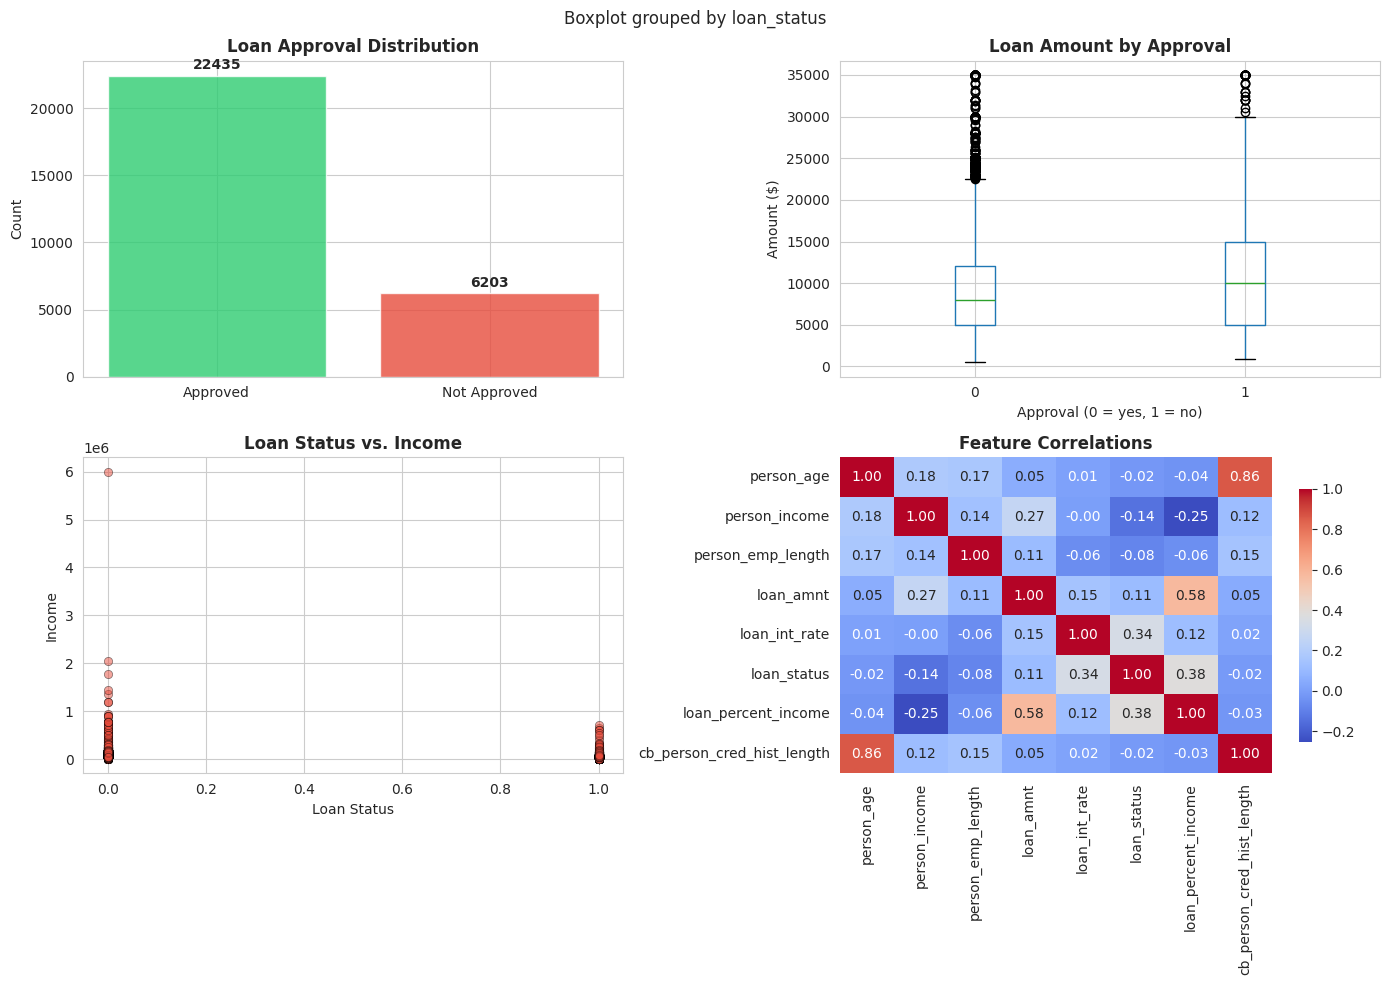


💡 Key Observations:
   • Strong positive correlation between age and credit history, and possible correlation between loan amount and percentage of income
   • A loan is less likely to be approved the higher the amount asked


In [42]:
from pandas.core.arrays import numeric
# Further exploring the data
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loan approval distribution
loan_approval_counts = numeric_cols_df['loan_status'].value_counts()
axes[0,0].bar(['Approved', 'Not Approved'], loan_approval_counts.values, color=['#2ECC71', '#E74C3C'], alpha=0.8)
axes[0,0].set_title('Loan Approval Distribution', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Count')
for i, v in enumerate(loan_approval_counts.values):
    axes[0,0].text(i, v + 500, str(v), ha='center', fontweight='bold')

# Amount distribution by approval status
numeric_cols_df.boxplot(column='loan_amnt', by='loan_status', ax=axes[0,1])
axes[0,1].set_title('Loan Amount by Approval', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Approval (0 = yes, 1 = no)')
axes[0,1].set_ylabel('Amount ($)')

# Loan status vs. Income
axes[1,0].scatter(numeric_cols_df['loan_status'], numeric_cols_df['person_income'], alpha=0.5, edgecolors='black', linewidth=0.5, color='#E74C3C')
axes[1,0].set_title('Loan Status vs. Income', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Loan Status')
axes[1,0].set_ylabel('Income')

# Correlation matrix
corr_matrix = numeric_cols_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1,1], cbar_kws={'shrink': 0.8})
axes[1,1].set_title('Feature Correlations', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 Key Observations:")
print(f"   • Strong positive correlation between age and credit history, and possible correlation between loan amount and percentage of income")
print(f"   • A loan is less likely to be approved the higher the amount asked")

Now that we've looked for and found some correlations, we can start to train and test our data to make predictions. First we need to prepare our train-and-test data sets.

In [43]:
#Training and Testing
X_loan = numeric_cols_df.drop(columns=['loan_status'])
y_loan = numeric_cols_df['loan_status']

# Split the data for test and train
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_loan, y_loan, test_size=0.25, random_state=42)

print("📊 Data Split Complete!")
print(f"   Training: {len(X_train_c)} clients")
print(f"   Testing: {len(X_test_c)} clients")

📊 Data Split Complete!
   Training: 21478 clients
   Testing: 7160 clients


After preparing the training and testing data, we train the data on our using three different models (Decision Trees, Random Forest, and Gradient Boosting) to determine which model is the best fit.

🔨 Training models on loan data...


🏆 Model Performance Comparison:


,Model,RMSE,MAE,R² Score
0,Random Forest,0.367879,0.135335,0.216950
1,Gradient Boosting,0.352168,0.124022,0.282406


🏆 Approval Prediction Results:
            Model  Accuracy
    Decision Tree  0.859637
    Random Forest  0.864665
Gradient Boosting  0.875978

💡 Best Model: Gradient Boosting


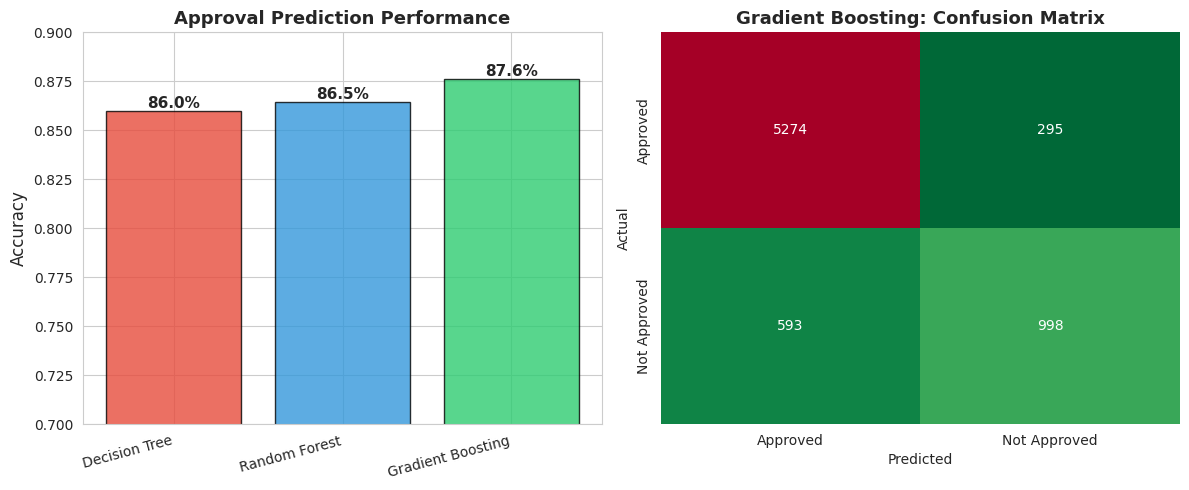


📊 Detailed Performance (Gradient Boosting):
              precision    recall  f1-score   support

    Approved       0.90      0.95      0.92      5569
Not Approved       0.77      0.63      0.69      1591

    accuracy                           0.88      7160
   macro avg       0.84      0.79      0.81      7160
weighted avg       0.87      0.88      0.87      7160



In [44]:
# Train models
print("🔨 Training models on loan data...\n")

# Model 1: Decision Tree
tree_loan = DecisionTreeClassifier(max_depth=7, random_state=42)
tree_loan.fit(X_train_c, y_train_c)
tree_pred_c = tree_loan.predict(X_test_c)
tree_acc_c = accuracy_score(y_test_c, tree_pred_c)

# Model 2: Random Forest
rf_loan = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_loan.fit(X_train_c, y_train_c)
rf_pred_c = rf_loan.predict(X_test_c)
rf_acc_c = accuracy_score(y_test_c, rf_pred_c)

# Model 3: Gradient Boosting
gb_loan = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gb_loan.fit(X_train_c, y_train_c)
gb_pred_c = gb_loan.predict(X_test_c)
gb_acc_c = accuracy_score(y_test_c, gb_pred_c)

rf_rmse = np.sqrt(mean_squared_error(y_test_c, rf_pred_c))
rf_mae = mean_absolute_error(y_test_c, rf_pred_c)
rf_r2 = r2_score(y_test_c, rf_pred_c)

# TODO: Calculate the same metrics for Gradient Boosting
gb_rmse = np.sqrt(mean_squared_error(y_test_c, gb_pred_c))
gb_mae = mean_absolute_error(y_test_c, gb_pred_c)
gb_r2 = r2_score(y_test_c, gb_pred_c)

# Create a comparison table
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'RMSE': [rf_rmse, gb_rmse],
    'MAE': [rf_mae, gb_mae],
    'R² Score': [rf_r2, gb_r2]
})

print("\n🏆 Model Performance Comparison:")
print("="*60)
display(results_df)

# Results
results_loan = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [tree_acc_c, rf_acc_c, gb_acc_c]
})

print("🏆 Approval Prediction Results:")
print(results_loan.to_string(index=False))
print(f"\n💡 Best Model: {results_loan.loc[results_loan['Accuracy'].idxmax(), 'Model']}")

# Visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
colors = ['#E74C3C', '#3498DB', '#2ECC71']
bars = plt.bar(results_loan['Model'], results_loan['Accuracy'], color=colors, alpha=0.8, edgecolor='black')
plt.ylabel('Accuracy', fontsize=12)
plt.title('Approval Prediction Performance', fontsize=13, fontweight='bold')
plt.ylim(0.7, 0.9)
plt.xticks(rotation=15, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1%}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Confusion matrix for Gradient Boosting
plt.subplot(1, 2, 2)
cm_gb = confusion_matrix(y_test_c, gb_pred_c)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='RdYlGn_r', cbar=False)
plt.title('Gradient Boosting: Confusion Matrix', fontsize=13, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.gca().set_xticklabels(['Approved', 'Not Approved'])
plt.gca().set_yticklabels(['Approved', 'Not Approved'])

plt.tight_layout()
plt.show()

# Print detailed classification report
print("\n📊 Detailed Performance (Gradient Boosting):")
print(classification_report(y_test_c, gb_pred_c, target_names=['Approved', 'Not Approved']))

We have our models ready so now we look for feature importance.

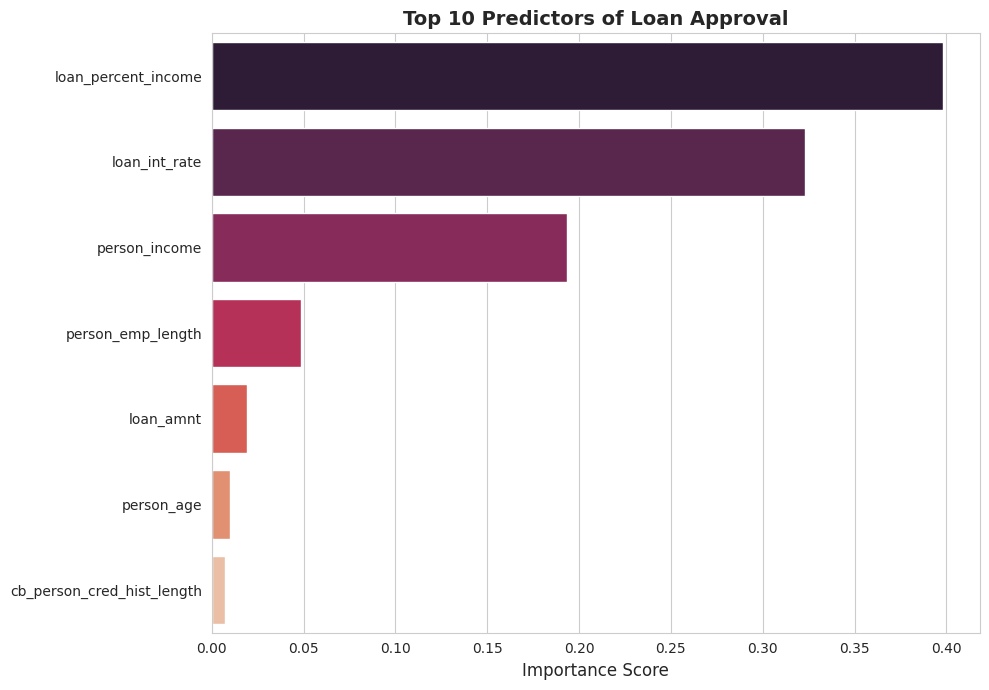


🎯 Top 10 Most Important Features:
                   Feature  Importance
       loan_percent_income    0.398386
             loan_int_rate    0.323063
             person_income    0.193559
         person_emp_length    0.048542
                 loan_amnt    0.019298
                person_age    0.010152
cb_person_cred_hist_length    0.007000

💡 Key Insights:
The loan as a percentage of income is likely the largest numerical factor to a loan's approval
Surprisingly, an applicant's time employed is a distant fourth, and then how much the loan itself is for is even further behind at fifth!


In [46]:
# Feature importance
feature_importance_credit = pd.DataFrame({
    'Feature': X_loan.columns,
    'Importance': gb_loan.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

# Visualize top 10 features
plt.figure(figsize=(10, 7))
sns.barplot(data=feature_importance_credit, x='Importance', y='Feature', palette='rocket')
plt.title('Top 10 Predictors of Loan Approval', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('')
plt.tight_layout()
plt.show()

print("\n🎯 Top 10 Most Important Features:")
print(feature_importance_credit.to_string(index=False))

print("\n💡 Key Insights:")
print("The loan as a percentage of income is likely the largest numerical factor to a loan's approval")
print("Surprisingly, an applicant's time employed is a distant fourth, and then how much the loan itself is for is even further behind at fifth!")

We also must address the limitations of the analysis and the data.